In [ ]:
import pandas as pd
import numpy as np
import re
import csv
from keras import backend as K

Using TensorFlow backend.


In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
from pandas import read_csv, DataFrame
from numpy.random import seed
from sklearn.preprocessing import scale
from keras.models import Sequential
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Dense, concatenate
from keras.layers.normalization import BatchNormalization
from keras.layers import Input, Conv2D, Dense, concatenate
from keras.models import Model
import os
import sys
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from keras.initializers import Constant
from keras.layers import merge, recurrent, Dense, Input, Dropout, TimeDistributed, LSTM

In [ ]:
char_to_index = {'M': 0, 'S': 1, 'V': 2, 'E': 3, 'D': 4, 'F': 5, 'I': 6, 'Q': 7, 'P': 8, 'Y': 9, 'T': 10, 'L': 11, 'N': 12, 'R': 13, 'G': 14, 'K': 15, 'C': 16, 'H': 17, 'A': 18, 'W': 19, 'U': 20, 'N': 21, 'X': 22}
index_to_char = {0: 'M', 1: 'S', 2: 'V', 3: 'E', 4: 'D', 5: 'F', 6: 'I', 7: 'Q', 8: 'P', 9: 'Y', 10: 'T', 11: 'L', 12: 'N', 13: 'R', 14: 'G', 15: 'K', 16: 'C', 17: 'H', 18: 'A', 19: 'W', 20: 'U', 21: 'N'}
n_letters = len(char_to_index)

categories = [0, 1]
proteins = {}
training_data = []
val_data = []
test_data = []
loss_history = []

In [ ]:
def importData(): 
  temp = 0
  with open("gdrive/My Drive/MTP_uddeshya/MTP1/protein_amino_acid_mapping2.txt") as protein_data:
    for line in protein_data:
      line = line.strip('\n')
      name_seq_pair = line.split(' ')
      proteins[name_seq_pair[0]] = name_seq_pair[1]
                                         
  protein_data.close()

  with open('gdrive/My Drive/MTP_uddeshya/MTP1/train_file2.txt') as train_data:
    for line in train_data:
      line = line.strip('\n')
      training_data.append(line)
      temp = max(temp, len(line))
  train_data.close()

  with open('gdrive/My Drive/MTP_uddeshya/MTP1/val_file2.txt') as validation_data:
    for line in validation_data:
      line = line.strip('\n')
      val_data.append(line)
      temp = max(temp, len(line))
  validation_data.close()

  # with open('gdrive/My Drive/MTP_uddeshya/MTP1/test_file2.txt') as testing_data:
  #   for line in testing_data:
  #     line = line.strip('\n')
  #     test_data.append(line)

  # testing_data.close()
  return temp

In [ ]:
inputA = Input(shape=(1200,))
inputB = Input(shape=(1200,))
 
# the first branch operates on the first input
embedded_sequences = Embedding(23,128)(inputA)
x = Conv1D(filters = 64, kernel_size = 10, activation="relu")(embedded_sequences)
x = MaxPooling1D(2)(x)
x = Conv1D(64, 8, activation='relu')(x)
x = MaxPooling1D(2)(x)
x = Conv1D(64, 5, activation='relu')(x)
x = MaxPooling1D(2)(x)
x = LSTM(80)(x)
x = Model(inputs=inputA, outputs=x)
 
# the second branch opreates on the second input
embedded_sequencesb = Embedding(23,128)(inputB)
y = Conv1D(filters = 64, kernel_size = 10, activation="relu")(embedded_sequencesb)
y = MaxPooling1D(2)(y)
y = Conv1D(64, 8, activation='relu')(y)
y = MaxPooling1D(2)(y)
y = Conv1D(64, 5, activation='relu')(y)
y = MaxPooling1D(2)(y)
y = LSTM(80)(y)
y = Model(inputs=inputB, outputs=y)
 
# combine the output of the two branches
combined = concatenate([x.output, y.output])
 
# apply a FC layer and then a regression prediction on the
# combined outputs
# z = Dense(2, activation="relu")(combined)
z = Dense(1, activation="sigmoid")(combined)
 
# our model will accept the inputs of the two branches and
# then output a single value
model = Model(inputs=[x.input, y.input], outputs=z)

In [ ]:
inputA = Input(shape=(1200,))
inputB = Input(shape=(1200,))
 
# the first branch operates on the first input
embedded_sequences = Embedding(23,128)(inputA)
x = Conv1D(filters = 64, kernel_size = 10, activation="relu")(embedded_sequences)
x = MaxPooling1D(2)(x)
x = Conv1D(64, 5, activation='relu')(x)
x = MaxPooling1D(2)(x)
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D(2)(x)
x = LSTM(80)(x)
x = Model(inputs=inputA, outputs=x)
 
# the second branch opreates on the second input
embedded_sequencesb = Embedding(23,128)(inputB)
y = Conv1D(filters = 64, kernel_size = 10, activation="relu")(embedded_sequencesb)
y = MaxPooling1D(2)(y)
y = Conv1D(64, 5, activation='relu')(y)
y = MaxPooling1D(2)(y)
y = Conv1D(64, 3, activation='relu')(y)
y = MaxPooling1D(2)(y)
y = LSTM(80)(y)
y = Model(inputs=inputB, outputs=y)
 
# combine the output of the two branches
combined = concatenate([x.output, y.output])
 
# apply a FC layer and then a regression prediction on the
# combined outputs
# z = Dense(2, activation="relu")(combined)
z = Dense(1, activation="sigmoid")(combined)
 
# our model will accept the inputs of the two branches and
# then output a single value
model = Model(inputs=[x.input, y.input], outputs=z)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc',f1_m,precision_m, recall_m])

In [ ]:
hist = model.fit_generator(get_data(training_data),
                    steps_per_epoch=100, validation_data = get_data(val_data), validation_steps = 100, epochs=30)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/30
100/100 [==============================] - 74s 738ms/step - loss: 0.6875 - acc: 0.5463 - f1_m: 0.3128 - precision_m: 0.6212 - recall_m: 0.2633 - val_loss: 0.6581 - val_acc: 0.5305 - val_f1_m: 0.1189 - val_precision_m: 0.3450 - val_recall_m: 0.0762
Epoch 2/30
100/100 [==============================] - 74s 737ms/step - loss: 0.6834 - acc: 0.5590 - f1_m: 0.2987 - precision_m: 0.6195 - recall_m: 0.2422 - val_loss: 0.7089 - val_acc: 0.5496 - val_f1_m: 0.2673 - val_precision_m: 0.5182 - val_recall_m: 0.1951
Epoch 3/30
100/100 [==============================] - 72s 724ms/step - loss: 0.6848 - acc: 0.5488 - f1_m: 0.1427 - precision_m: 0.6869 - recall_m: 0.0830 - val_loss: 0.7257 - val_acc: 0.5529 - val_f1_m: 0.2324 - val_precision_m: 0.5000 - val_recall_m: 0.1619
Epoch 4/30
100/100 [==============================] - 72s 723ms/step - loss: 0.6865 - acc: 0.5337 - f1_m: 0.1673 - precision_m: 0.6114 - recall_m: 0.1258 - val_loss: 0.6893 - val_acc: 0.5421 - val_f1_m: 0.1546 - val_precisi

In [ ]:
history_dict = hist.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'val_f1_m', 'val_precision_m', 'val_recall_m', 'loss', 'acc', 'f1_m', 'precision_m', 'recall_m'])

In [ ]:
df = pd.DataFrame(val_data, columns=['TEST'])
a ,b, y = prepare_data(df)
a = pad(a)
b = pad(b)
Xtest = [a,b]
ytest = y
loss, accuracy, f1_score, precision, recall = model.evaluate(Xtest, ytest, verbose=0)
print(f1_score, precision, recall)

0.900733232498169 0.9628710746765137 0.8523049354553223


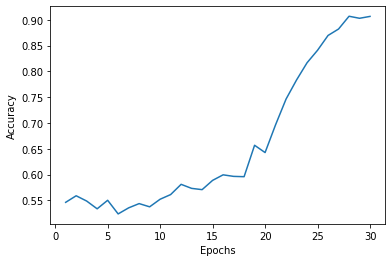

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
acc_values = history_dict['acc']
val_loss_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, acc_values)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

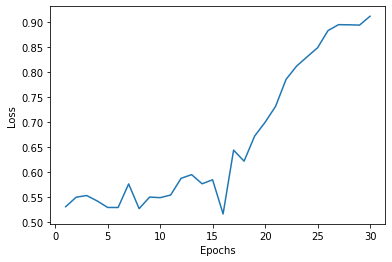

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
loss_values = history_dict['loss']
val_loss_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, val_loss_values)
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [ ]:
t = importData()

In [ ]:
def get_data(data):
  while(True):
    df = pd.DataFrame(data, columns=['TEST'])
    df_split = np.array_split(df, 500)
    for i in range(len(df_split)):
      data2 = df_split[i]
      a ,b, y = prepare_data(data2)
      a = pad(a)
      b = pad(b)
      x = [a,b]
      y = y
      yield (x, y)
      

In [ ]:
def prepare_data(data):
  t1 = []
  t2 = []
  t3 = []
  temp = 0
  temp2 = 0
  #data = np.asarray(data)
  data = data.reset_index()
  # print(data)
  for i in range(len(data)):
    t = data['TEST'][i]
    #print(t)
    r = t.split(" ")
    w = r[0].split("-")
    #print(w)
    a = re.sub("[?]","",w[0])
    b = re.sub("[?]","", w[1])
    temp = max(len(proteins[a]), temp)
    temp2 = max(len(proteins[b]), temp2)
    if len(proteins[a])<=1200 and len(proteins[b])<=1200:
      t1.append(proteins[a])
      t2.append(proteins[b])
      t3.append(int(r[1]))
    else:
      continue
  return t1, t2, t3

In [ ]:
def pad(x):
  arr = []
  count = 0
  a = []
  for i in x:
    m = [23]*1200
    count += 1
    i = i.upper()
    for j in range(len(i)):
      m[j] = char_to_index[i[j]]
    arr.append(m)
  return np.asarray(arr)
  
  #return arr

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1200)         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1200)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1200, 128)    2944        input_1[0][0]                    
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 1200, 128)    2944        input_2[0][0]                    
____________________________________________________________________________________________

In [ ]:
hist = model.fit_generator(get_data(training_data),
                    steps_per_epoch=100, validation_data = get_data(val_data), validation_steps = 100, epochs=30)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/30
100/100 [==============================] - 78s 781ms/step - loss: 0.6866 - accuracy: 0.5490 - val_loss: 0.6576 - val_accuracy: 0.5386
Epoch 2/30
100/100 [==============================] - 68s 682ms/step - loss: 0.6675 - accuracy: 0.5883 - val_loss: 0.6426 - val_accuracy: 0.6124
Epoch 3/30
100/100 [==============================] - 68s 679ms/step - loss: 0.6309 - accuracy: 0.6638 - val_loss: 0.6804 - val_accuracy: 0.6719
Epoch 4/30
100/100 [==============================] - 69s 686ms/step - loss: 0.6299 - accuracy: 0.6599 - val_loss: 0.6340 - val_accuracy: 0.6727
Epoch 5/30
100/100 [==============================] - 68s 677ms/step - loss: 0.6364 - accuracy: 0.6359 - val_loss: 0.6769 - val_accuracy: 0.6382
Epoch 6/30
100/100 [==============================] - 68s 682ms/step - loss: 0.6804 - accuracy: 0.5588 - val_loss: 0.6770 - val_accuracy: 0.5225
Epoch 7/30
100/100 [==============================] - 68s 684ms/step - loss: 0.6763 - accuracy: 0.5731 - val_loss: 0.7330 - val_ac

In [ ]:
history_dict = hist.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

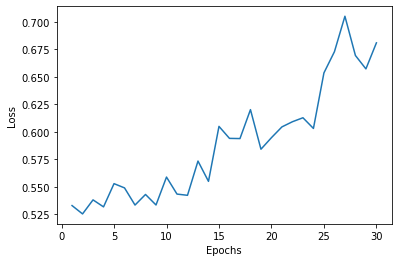

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
loss_values = history_dict['acc']
val_loss_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, val_loss_values)
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [ ]:
# arr_loss = []
# arr_acc = []
# arr_loss_val = []
# arr_acc_val = []
arr_loss_val.append(history_dict['loss'])
arr_acc_val.append(history_dict['acc'])
arr_loss.append(history_dict['loss'])
arr_acc.append(history_dict['acc'])

In [ ]:
arr_loss_val.pop()
arr_acc_val.pop()
arr_loss.pop()
arr_acc.pop()

[0.5474686451685317,
 0.6011571334828051,
 0.563066779065724,
 0.5109729354311361,
 0.5287068007754065,
 0.5356587052869128,
 0.5395353120082075,
 0.5419071188386438,
 0.5309985400298126,
 0.551003345035346,
 0.5515883934210806,
 0.56616769666864,
 0.5790052240236869,
 0.607168985589325,
 0.6020995936221857,
 0.6037718591198514,
 0.56056570842286,
 0.6191261295948184,
 0.59089246780585,
 0.5890932733166045,
 0.5648631333764587,
 0.6287078678044136,
 0.5979664777812912,
 0.6420080478370582,
 0.6694537325613741,
 0.6819555091626541,
 0.6953806612311847,
 0.7438856843267593,
 0.7594184340212846,
 0.5441285787224327]

In [ ]:
def make_model(l):
  inputA = Input(shape=(1200,))
  inputB = Input(shape=(1200,))
  
  # the first branch operates on the first input
  embedded_sequences = Embedding(23,128)(inputA)
  x = Conv1D(filters = 64, kernel_size = 10, activation="relu")(embedded_sequences)
  x = MaxPooling1D(2)(x)
  for _ in range(l):
    x = Conv1D(64, 8, activation='relu')(x)
    x = MaxPooling1D(2)(x)
  # x = Conv1D(64, 5, activation='relu')(x)
  # x = MaxPooling1D(2)(x)
  x = LSTM(80)(x)
  x = Model(inputs=inputA, outputs=x)
  
  # the second branch opreates on the second input
  embedded_sequencesb = Embedding(23,128)(inputB)
  y = Conv1D(filters = 64, kernel_size = 10, activation="relu")(embedded_sequencesb)
  y = MaxPooling1D(2)(y)
  for _ in range(l):
    y = Conv1D(64, 8, activation='relu')(y)
    y = MaxPooling1D(2)(y)
  # y = Conv1D(64, 8, activation='relu')(y)
  # y = MaxPooling1D(2)(y)
  # y = Conv1D(64, 5, activation='relu')(y)
  # y = MaxPooling1D(2)(y)
  y = LSTM(80)(y)
  y = Model(inputs=inputB, outputs=y)
  
  # combine the output of the two branches
  combined = concatenate([x.output, y.output])
  
  # apply a FC layer and then a regression prediction on the
  # combined outputs
  # z = Dense(2, activation="relu")(combined)
  z = Dense(1, activation="sigmoid")(combined)
  
  # our model will accept the inputs of the two branches and
  # then output a single value
  return Model(inputs=[x.input, y.input], outputs=z)

In [ ]:
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
from keras import backend as K
from sklearn.metrics import confusion_matrix
arr_loss = []
arr_acc = []
arr_loss_val = []
arr_acc_val = []
f1 = []
preci = []
reca = []
conf_mat = []
for i in range(0,3):
  model = make_model(i)
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc',f1_m,precision_m, recall_m])
  print(model.summary())
  hist = model.fit_generator(get_data(training_data),steps_per_epoch=100, validation_data = get_data(val_data), validation_steps = 100, epochs=30)
  df = pd.DataFrame(val_data, columns=['TEST'])
  a ,b, y = prepare_data(df)
  a = pad(a)
  b = pad(b)
  Xtest = [a,b]
  ytest = y
  loss, accuracy, f1_score, precision, recall = model.evaluate(Xtest, ytest, verbose=0)
  y_pred = model.predict(Xtest)
  y_t = []
  for i in range(len(y_pred)):
    if y_pred[i]>=0.5:
      y_t.append(1)
    else:
      y_t.append(0)
  conf_mat.append(confusion_matrix(ytest, y_t))
  history_dict = hist.history
  f1.append(f1_score)
  preci.append(precision)
  reca.append(recall)
  arr_loss_val.append(history_dict['loss'])
  arr_acc_val.append(history_dict['acc'])
  arr_loss.append(history_dict['loss'])
  arr_acc.append(history_dict['acc'])
  if i<2:
    K.clear_session()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 1200)         0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 1200)         0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 1200, 128)    2944        input_3[0][0]                    
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 1200, 128)    2944        input_4[0][0]                    
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/30


ValueError: ignored

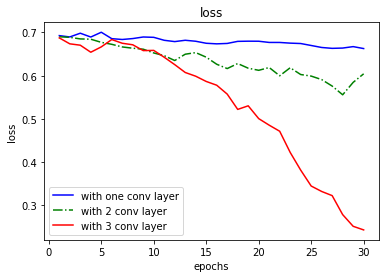

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
epochs = range(1, 30 + 1)
plt.plot(epochs, arr_loss[0], 'b-', label='with one conv layer')
plt.plot(epochs, arr_loss[1], 'g-.', label='with 2 conv layer')
plt.plot(epochs, arr_loss[2], 'r-', label='with 3 conv layer')
plt.title('training loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

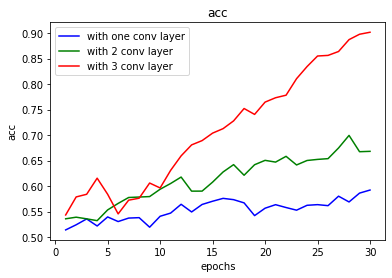

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
epochs = range(1, 30 + 1)
plt.plot(epochs, arr_acc[0], 'b-', label='with one conv layer')
plt.plot(epochs, arr_acc[1], 'g-', label='with 2 conv layer')
plt.plot(epochs, arr_acc[2], 'r-', label='with 3 conv layer')
plt.title('training accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend()
plt.show()

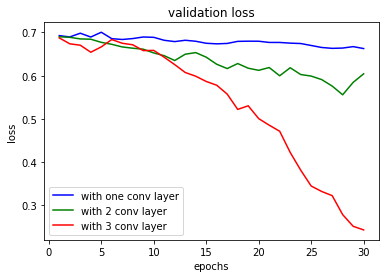

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
epochs = range(1, 30 + 1)
plt.plot(epochs, arr_loss_val[0], 'b-', label='with one conv layer')
plt.plot(epochs, arr_loss_val[1], 'g-', label='with 2 conv layer')
plt.plot(epochs, arr_loss_val[2], 'r-', label='with 3 conv layer')
plt.title('validation loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

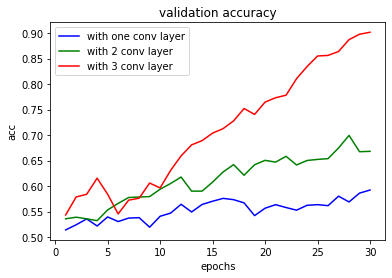

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
epochs = range(1, 30 + 1)
plt.plot(epochs, arr_acc_val[0], 'b-', label='with one conv layer')
plt.plot(epochs, arr_acc_val[1], 'g-', label='with 2 conv layer')
plt.plot(epochs, arr_acc_val[2], 'r-', label='with 3 conv layer')
plt.title('validation accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [ ]:
print("Model 1")
print("f1_score: ", f1[0])
print("precision: ", preci[0])
print("recall: ", reca[0])
print("confusion matrix: " , conf_mat[0])

Model 1
f1_score:  0.548113934646379
precision:  0.604612387805585
recall:  0.5139754549951743
confusion matrix:  [[2119  989]
 [1417 1515]]


In [ ]:
print("Model 2")
print("f1_score: ", f1[1])
print("precision: ", preci[1])
print("recall: ", reca[1])
print("confusion matrix: " , conf_mat[1])

Model 2
f1_score:  0.5601294815935046
precision:  0.7514022160839561
recall:  0.4594546881732562
confusion matrix:  [[2658  450]
 [1578 1354]]


In [ ]:
print("Model 3")
print("f1_score: ", f1[2])
print("precision: ", preci[2])
print("recall: ", reca[2])
print("confusion matrix: " , conf_mat[2])

Model 3
f1_score:  0.8619599693658336
precision:  0.9385562298313671
recall:  0.8037408932944796
confusion matrix:  [[2960  148]
 [ 579 2353]]


In [ ]:
def make_model(l):
  inputA = Input(shape=(1200,))
  inputB = Input(shape=(1200,))
  
  # the first branch operates on the first input
  embedded_sequences = Embedding(23,128)(inputA)
  x = Conv1D(filters = 64, kernel_size = 10, activation="relu")(embedded_sequences)
  x = MaxPooling1D(2)(x)
  if l<=2:
    m = l
    n = 0
  else:
    m= 2 
    n = l-2
  for _ in range(n):
    y = Conv1D(64, 8, activation='relu')(x)
    y = MaxPooling1D(2)(y)
  for _ in range(m):
    y = Conv1D(64, 5, activation='relu')(x)
    y = MaxPooling1D(2)(y)
  # x = Conv1D(64, 5, activation='relu')(x)
  # x = MaxPooling1D(2)(x)
  x = LSTM(80)(x)
  x = Model(inputs=inputA, outputs=x)
  
  # the second branch opreates on the second input
  embedded_sequencesb = Embedding(23,128)(inputB)
  y = Conv1D(filters = 64, kernel_size = 10, activation="relu")(embedded_sequencesb)
  y = MaxPooling1D(2)(y)
  if l<=2:
    m = l
    n = 0
  else:
    m= 2 
    n = l-2
  for _ in range(n):
    y = Conv1D(64, 8, activation='relu')(y)
    y = MaxPooling1D(2)(y)
  for _ in range(m):
    y = Conv1D(64, 5, activation='relu')(y)
    y = MaxPooling1D(2)(y)
  # y = Conv1D(64, 8, activation='relu')(y)
  # y = MaxPooling1D(2)(y)
  # y = Conv1D(64, 5, activation='relu')(y)
  # y = MaxPooling1D(2)(y)
  y = LSTM(80)(y)
  y = Model(inputs=inputB, outputs=y)
  
  # combine the output of the two branches
  combined = concatenate([x.output, y.output])
  
  # apply a FC layer and then a regression prediction on the
  # combined outputs
  # z = Dense(2, activation="relu")(combined)
  z = Dense(1, activation="sigmoid")(combined)
  
  # our model will accept the inputs of the two branches and
  # then output a single value
  return Model(inputs=[x.input, y.input], outputs=z)

In [ ]:
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
from keras import backend as K
from sklearn.metrics import confusion_matrix
arr_loss = []
arr_acc = []
arr_loss_val = []
arr_acc_val = []
f1 = []
preci = []
reca = []
conf_mat = []
for i in range(1,6):
  model = make_model(i)
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc',f1_m,precision_m, recall_m])
  print(model.summary())
  hist = model.fit_generator(get_data(training_data),steps_per_epoch=100, validation_data = get_data(val_data), validation_steps = 100, epochs=30)
  df = pd.DataFrame(val_data, columns=['TEST'])
  a ,b, y = prepare_data(df)
  a = pad(a)
  b = pad(b)
  Xtest = [a,b]
  ytest = y
  loss, accuracy, f1_score, precision, recall = model.evaluate(Xtest, ytest, verbose=0)
  y_pred = model.predict(Xtest)
  y_t = []
  for i in range(len(y_pred)):
    if y_pred[i]>=0.5:
      y_t.append(1)
    else:
      y_t.append(0)
  conf_mat.append(confusion_matrix(ytest, y_t))
  history_dict = hist.history
  f1.append(f1_score)
  preci.append(precision)
  reca.append(recall)
  arr_loss_val.append(history_dict['loss'])
  arr_acc_val.append(history_dict['acc'])
  arr_loss.append(history_dict['loss'])
  arr_acc.append(history_dict['acc'])
  if i<2:
    K.clear_session()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
epochs = range(1, 30 + 1)
plt.plot(epochs, arr_loss[0], 'b-', label='with 1 conv layer')
plt.plot(epochs, arr_loss[1], 'g-.', label='with 2 conv layer')
plt.plot(epochs, arr_loss[2], 'r-', label='with 3 conv layer')
plt.plot(epochs, arr_loss[3], 'y-.', label='with 4 conv layer')
plt.plot(epochs, arr_loss[4], 'o-', label='with 5 conv layer')
plt.title('training loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
epochs = range(1, 30 + 1)
plt.plot(epochs, arr_acc[0], 'b-', label='with 1 conv layer')
plt.plot(epochs, arr_acc[1], 'g-', label='with 2 conv layer')
plt.plot(epochs, arr_acc[2], 'r-', label='with 3 conv layer')
plt.plot(epochs, arr_acc[3], 'y-', label='with 4 conv layer')
plt.plot(epochs, arr_acc[4], 'o-', label='with 5 conv layer')
plt.title('training accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
epochs = range(1, 30 + 1)
plt.plot(epochs, arr_loss_val[0], 'b-', label='with one conv layer')
plt.plot(epochs, arr_loss_val[1], 'g-', label='with 2 conv layer')
plt.plot(epochs, arr_loss_val[2], 'r-', label='with 3 conv layer')
plt.plot(epochs, arr_loss_val[3], 'y-', label='with 5 conv layer')
plt.plot(epochs, arr_loss_val[4], 'o-', label='with 4 conv layer')
plt.title('validation loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
epochs = range(1, 30 + 1)
plt.plot(epochs, arr_acc_val[0], 'b-', label='with one conv layer')
plt.plot(epochs, arr_acc_val[1], 'g-', label='with 2 conv layer')
plt.plot(epochs, arr_acc_val[2], 'r-', label='with 3 conv layer')
plt.plot(epochs, arr_acc_val[3], 'y-', label='with 4 conv layer')
plt.plot(epochs, arr_acc_val[4], 'o-', label='with 5 conv layer')
plt.title('validation accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [ ]:
print("Model 1")
print("f1_score: ", f1[0])
print("precision: ", preci[0])
print("recall: ", reca[0])
print("confusion matrix: " , conf_mat[0])

In [ ]:
print("Model 2")
print("f1_score: ", f1[1])
print("precision: ", preci[1])
print("recall: ", reca[1])
print("confusion matrix: " , conf_mat[1])

In [ ]:
print("Model 3")
print("f1_score: ", f1[2])
print("precision: ", preci[2])
print("recall: ", reca[2])
print("confusion matrix: " , conf_mat[2])

In [ ]:
print("Model 4")
print("f1_score: ", f1[3])
print("precision: ", preci[3])
print("recall: ", reca[3])
print("confusion matrix: " , conf_mat[3])

In [ ]:
print("Model 5")
print("f1_score: ", f1[4])
print("precision: ", preci[4])
print("recall: ", reca[4])
print("confusion matrix: " , conf_mat[4])